In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
def rmse(true, pred):
    return math.sqrt(mean_squared_error(true, pred))

# Regional Model with Temperature and T-1 Information

In [3]:
def Regional_Model(region, temperature=True):
    '''
    Aura, Bourgogne, Bretagne, Centre, GrandEst, HautsDeFrance, IDF, Normandie, NouvelleAquitaine, Occitanie, PACA, PaysDeLoire
    '''
    print("=========================================", region, "=========================================")
    df = pd.read_csv(f'https://raw.githubusercontent.com/Tdjaaleb/MALIA/main/Time%20Series/Preprocessing/Data/Region/clean_{region}.csv', sep=";")
    train = df[:52561]
    test = df[105216:]

    train = train.dropna()
    Y_train = train["Conso"]
    X_train = train.drop(["Conso","Date","Heure"], axis=1)

    Y_test = test["Conso"]
    X_test = test.drop(["Conso","Date","Heure"], axis=1)

    if temperature==False:
        X_train = X_train.drop(["ConsoT-1", "Temperature"], axis=1)
        X_test = X_test.drop(["ConsoT-1", "Temperature"], axis=1)
    model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
    model.fit(X_train, Y_train)

    print("========== RMSE ==========")
    pred = model.predict(X_test)
    print(rmse(Y_test, pred))

    print("========== Feature Importance ==========")
    feature_imp = pd.DataFrame({"Feature" : model.feature_names_in_, "Importance" : model.feature_importances_})
    print(feature_imp.sort_values("Importance", ascending=False))

    print("========== Prédiction des 3 premières semaines de Janvier 2022 ==========")
    plt.figure(figsize=(20,8))
    plt.plot(Y_test.reset_index()["Conso"][0:1008])
    plt.plot(pred[0:1008])
    plt.xlabel("Temps")
    plt.ylabel(f'Consommation Régional : {region}')
    plt.legend(["True", "GradientBoosting"])
    plt.show()


========================================= Aura =========================================
========== RMSE ==========
152.77371322554004
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.990127
1          tod    0.007338
5     ConsoJ-7    0.001121
0  Temperature    0.000529
4     ConsoJ-1    0.000526
2          tow    0.000306
3      Fourier    0.000054
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


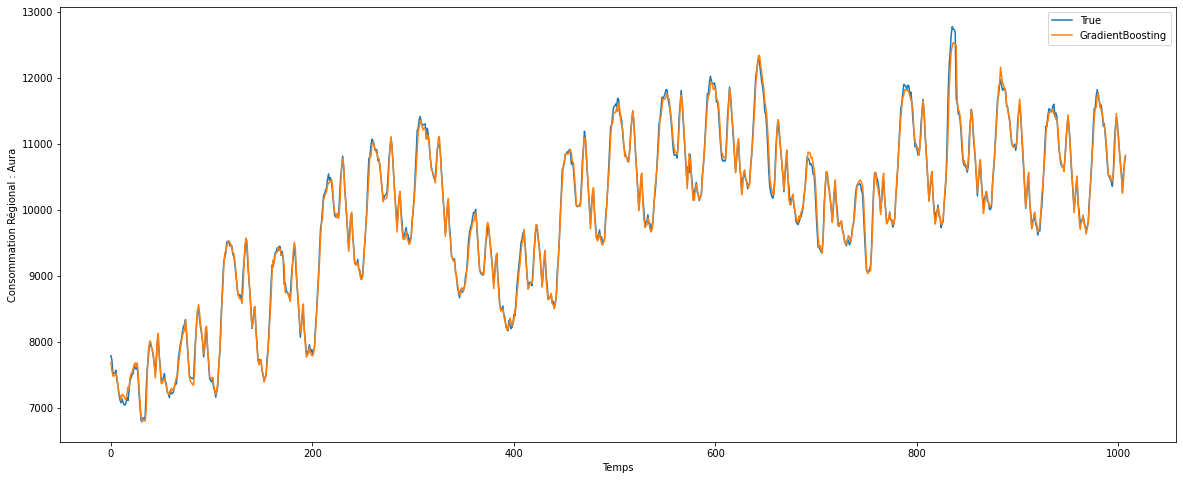

========================================= Bourgogne =========================================
========== RMSE ==========
51.06058901151407
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.986871
1          tod    0.008696
5     ConsoJ-7    0.002045
4     ConsoJ-1    0.001157
0  Temperature    0.000602
2          tow    0.000530
3      Fourier    0.000099
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


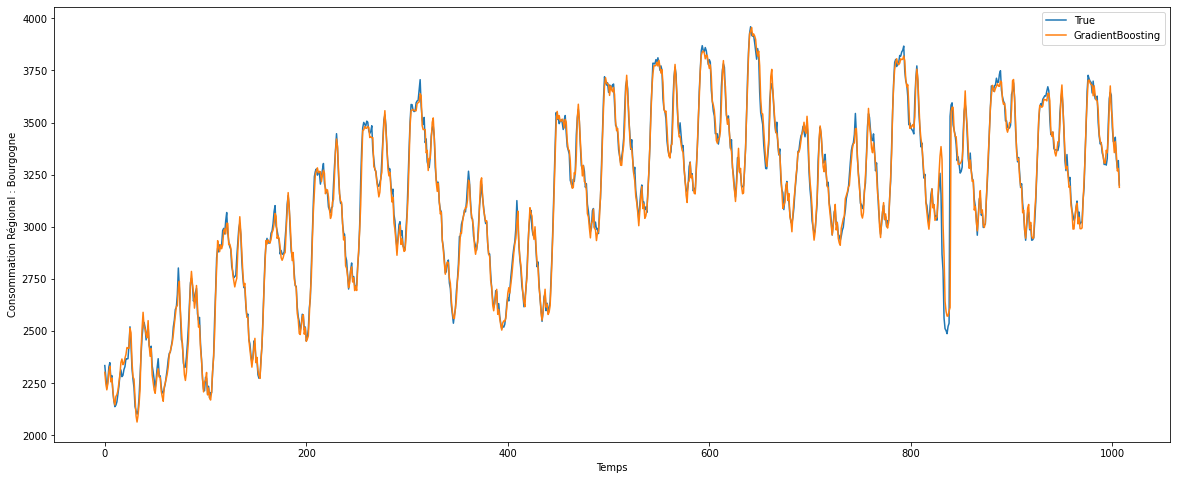

========================================= Bretagne =========================================
========== RMSE ==========
144.24413804223715
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.972410
1          tod    0.014011
5     ConsoJ-7    0.006774
4     ConsoJ-1    0.004153
0  Temperature    0.001489
2          tow    0.000936
3      Fourier    0.000227
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


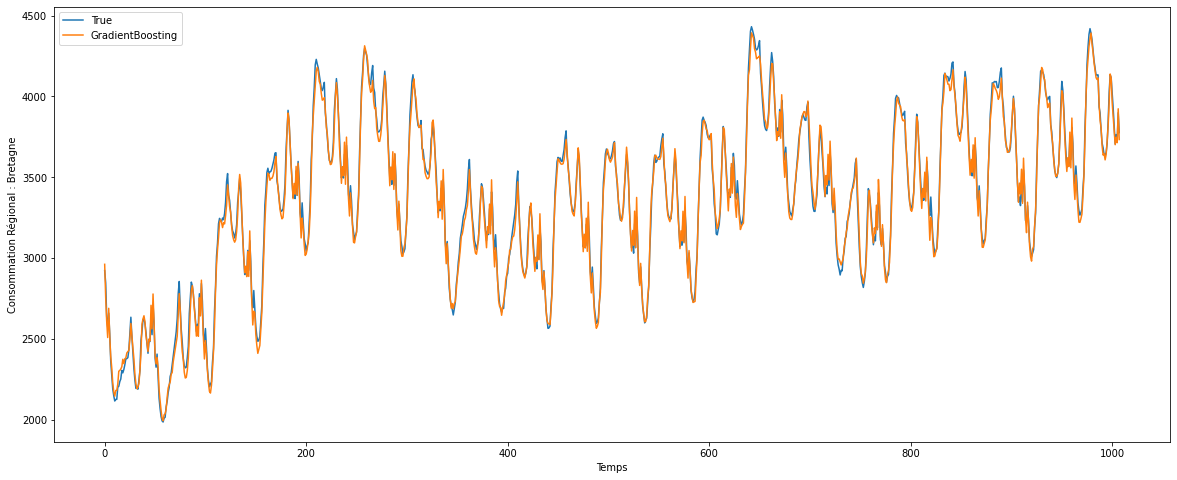

========================================= Centre =========================================
========== RMSE ==========
77.30172623767085
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.987808
1          tod    0.007346
4     ConsoJ-1    0.001844
5     ConsoJ-7    0.001158
0  Temperature    0.001144
2          tow    0.000600
3      Fourier    0.000100
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


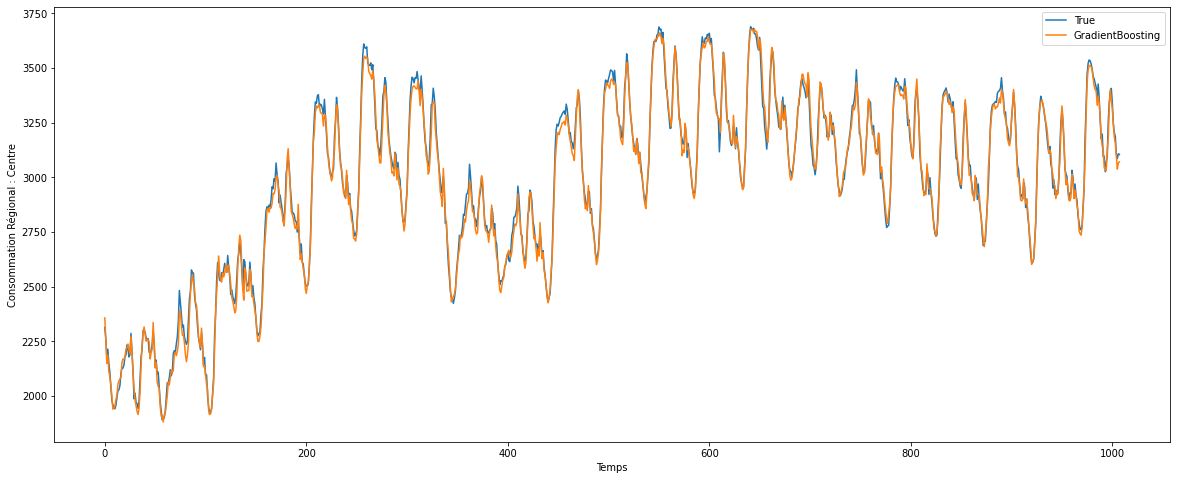

========================================= GrandEst =========================================
========== RMSE ==========
106.2524459269773
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.990078
1          tod    0.007451
5     ConsoJ-7    0.000827
4     ConsoJ-1    0.000754
0  Temperature    0.000442
2          tow    0.000378
3      Fourier    0.000071
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


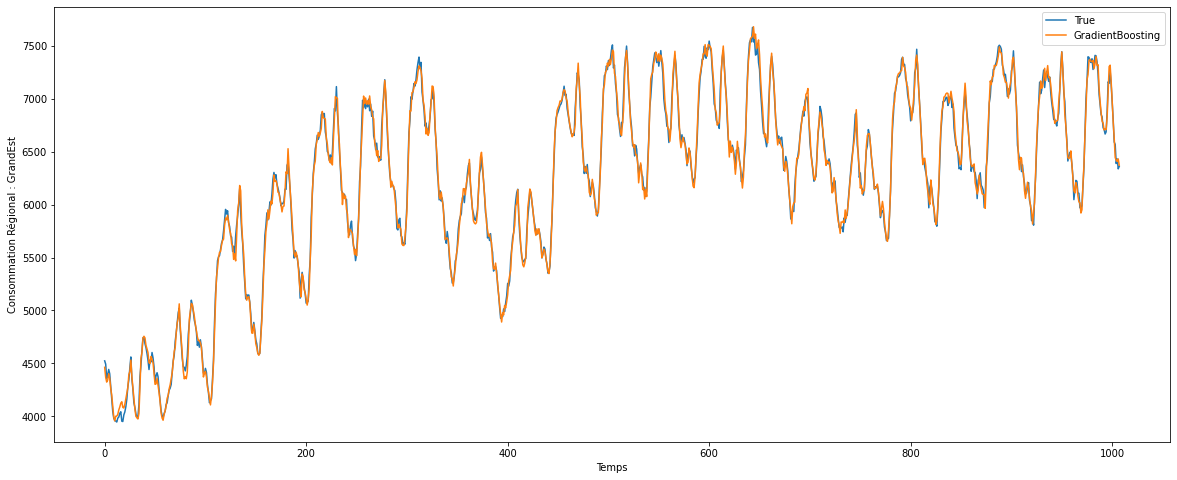

========================================= HautsDeFrance =========================================
========== RMSE ==========
127.20594017617137
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.987281
1          tod    0.008466
5     ConsoJ-7    0.001644
4     ConsoJ-1    0.001331
0  Temperature    0.000686
2          tow    0.000469
3      Fourier    0.000123
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


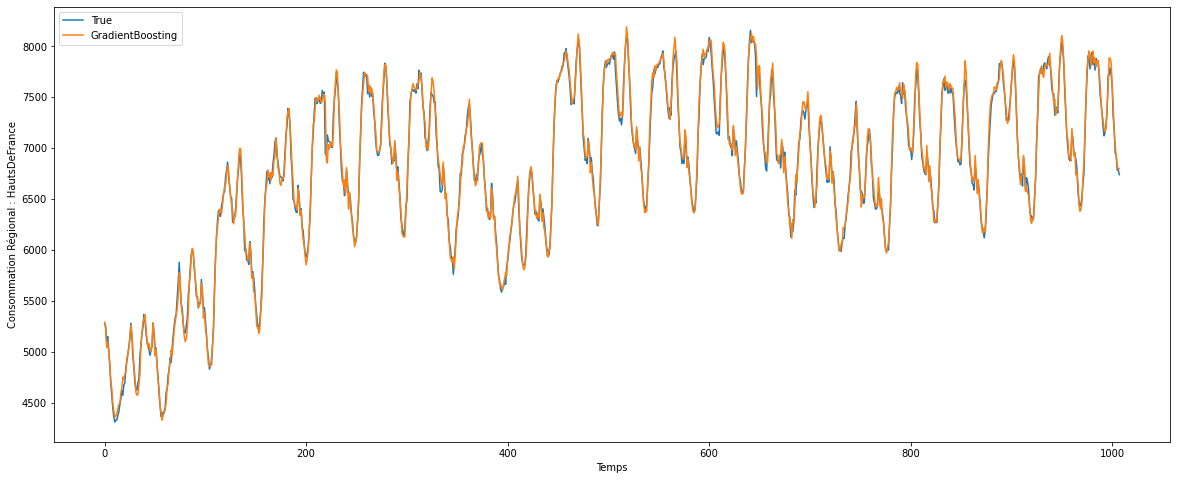

========================================= IDF =========================================
========== RMSE ==========
234.63684068420807
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.986610
1          tod    0.009365
4     ConsoJ-1    0.001639
5     ConsoJ-7    0.001134
0  Temperature    0.000761
2          tow    0.000428
3      Fourier    0.000063
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


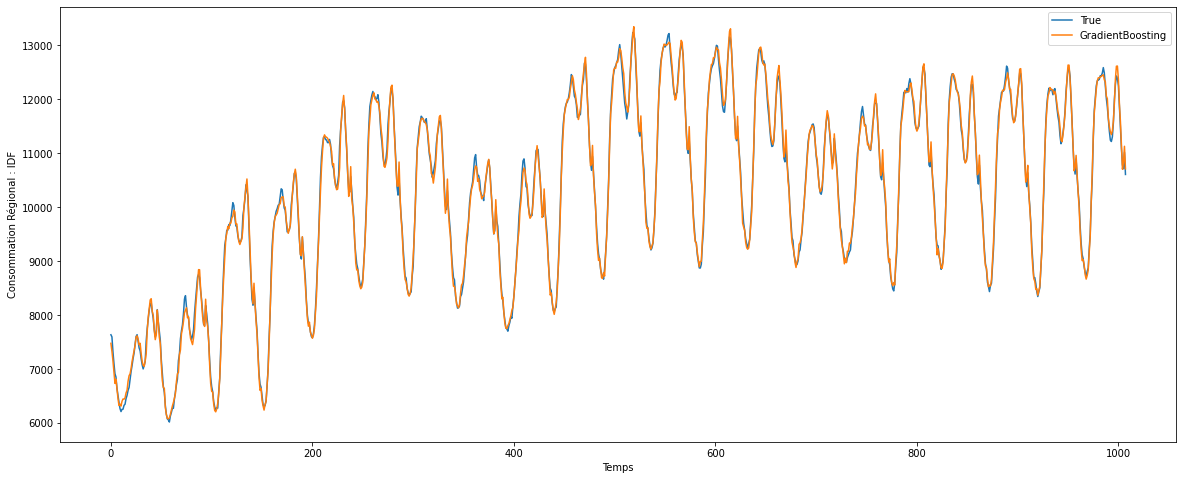

========================================= Normandie =========================================
========== RMSE ==========
89.8571602697452
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.987587
1          tod    0.008337
4     ConsoJ-1    0.001382
5     ConsoJ-7    0.001135
0  Temperature    0.001032
2          tow    0.000437
3      Fourier    0.000090
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


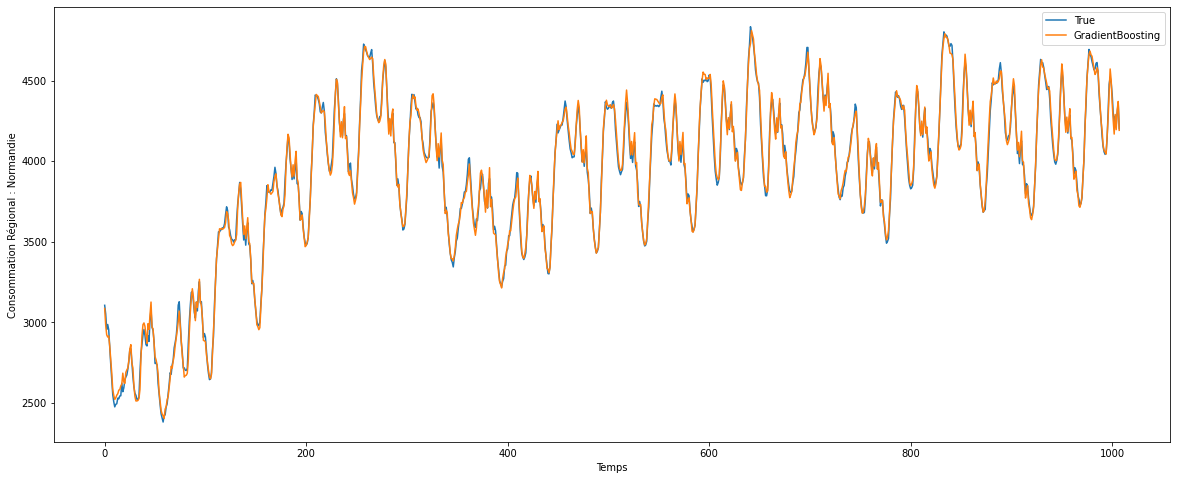

========================================= NouvelleAquitaine =========================================
========== RMSE ==========
276.6585804105966
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.983587
1          tod    0.009560
4     ConsoJ-1    0.002562
5     ConsoJ-7    0.001986
0  Temperature    0.001499
2          tow    0.000705
3      Fourier    0.000102
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


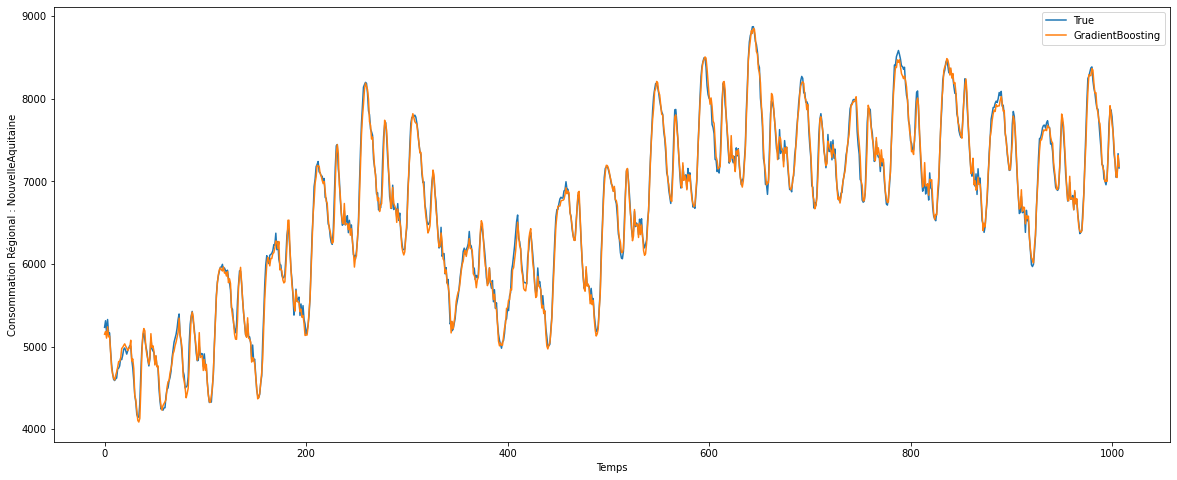

========================================= Occitanie =========================================
========== RMSE ==========
114.23672088147241
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.977926
1          tod    0.013490
4     ConsoJ-1    0.004927
5     ConsoJ-7    0.001563
0  Temperature    0.001362
2          tow    0.000587
3      Fourier    0.000145
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


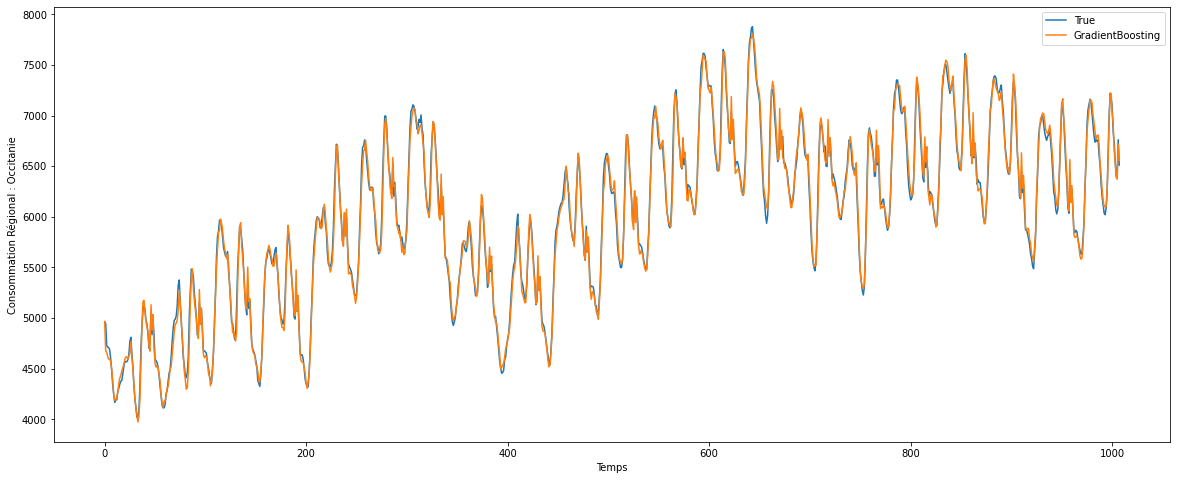

========================================= PACA =========================================
========== RMSE ==========
86.38630686200403
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.965177
1          tod    0.017285
4     ConsoJ-1    0.012356
5     ConsoJ-7    0.002902
0  Temperature    0.001357
2          tow    0.000753
3      Fourier    0.000169
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


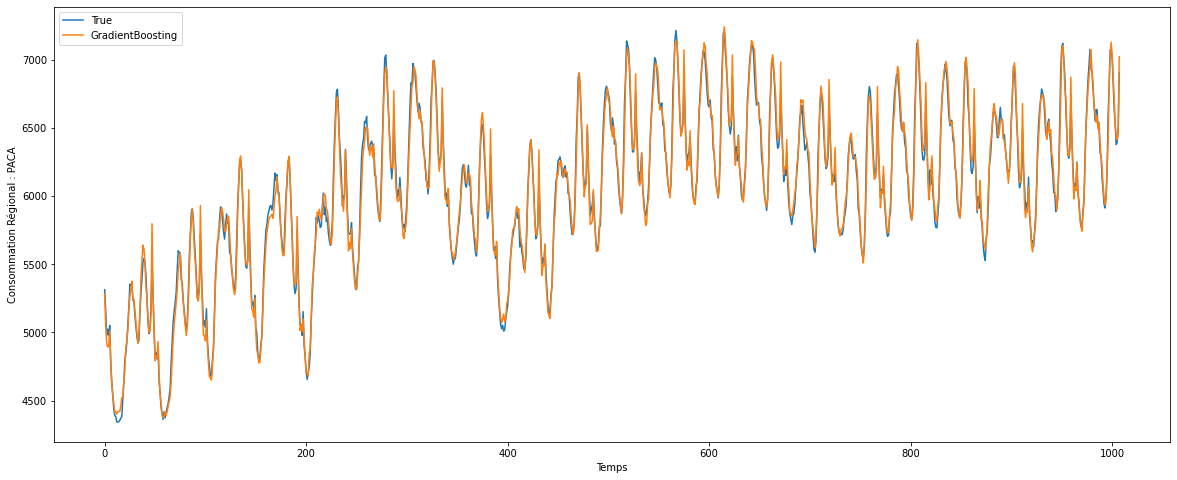

========================================= PaysDeLoire =========================================
========== RMSE ==========
192.17062843352693
========== Feature Importance ==========
       Feature  Importance
6     ConsoT-1    0.973370
1          tod    0.017185
5     ConsoJ-7    0.004297
4     ConsoJ-1    0.003020
0  Temperature    0.001258
2          tow    0.000790
3      Fourier    0.000081
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


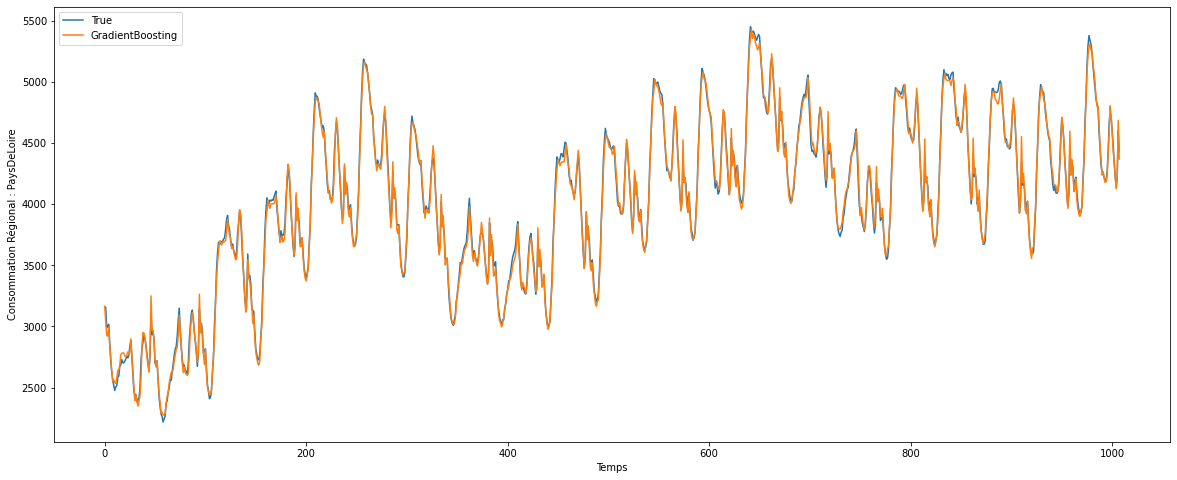

In [4]:
Regional_Model("Aura")
Regional_Model("Bourgogne")
Regional_Model("Bretagne")
Regional_Model("Centre")
Regional_Model("GrandEst")
Regional_Model("HautsDeFrance")
Regional_Model("IDF")
Regional_Model("Normandie")
Regional_Model("NouvelleAquitaine")
Regional_Model("Occitanie")
Regional_Model("PACA")
Regional_Model("PaysDeLoire")

# Regional Model without Temperature and T-1 Information

========================================= Aura =========================================
========== RMSE ==========
391.3623906695424
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.744771
4  ConsoJ-7    0.181972
1       tow    0.045108
2   Fourier    0.018069
0       tod    0.010080
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


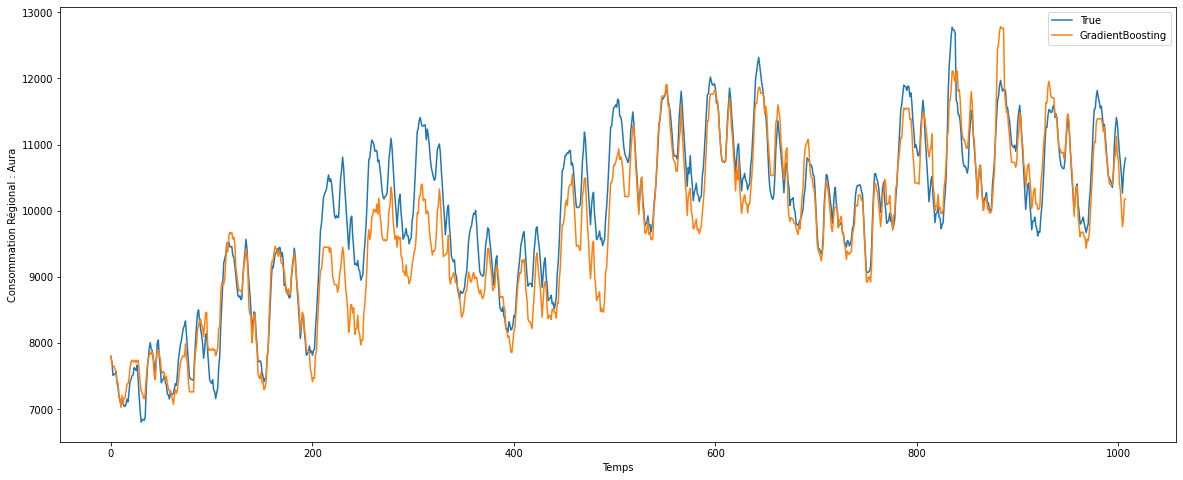

========================================= Bourgogne =========================================
========== RMSE ==========
153.57174764981065
========== Feature Importance ==========
    Feature  Importance
4  ConsoJ-7    0.502972
3  ConsoJ-1    0.423207
1       tow    0.048606
2   Fourier    0.015988
0       tod    0.009228
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


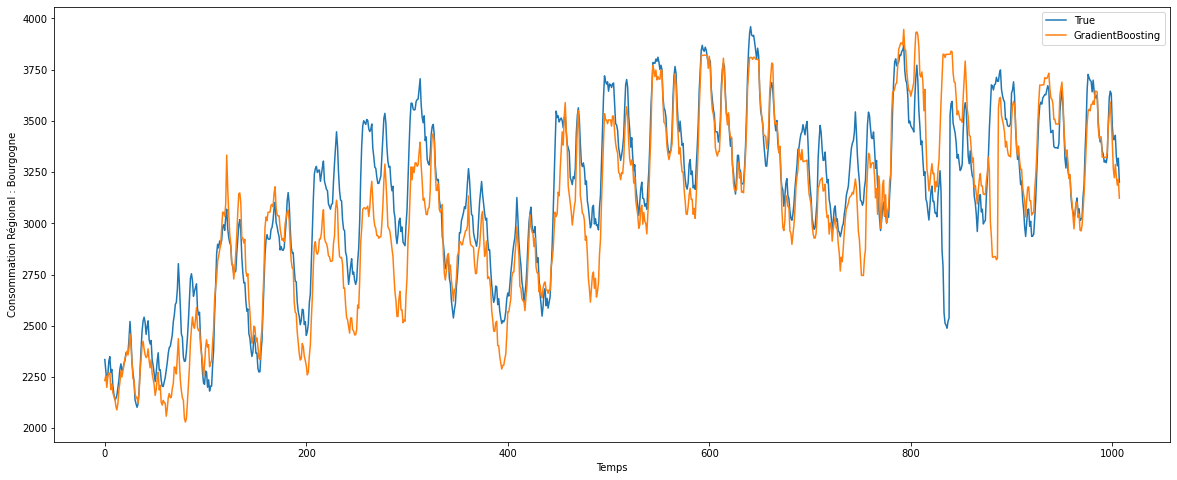

========================================= Bretagne =========================================
========== RMSE ==========
212.1297520236455
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.744946
4  ConsoJ-7    0.179524
1       tow    0.044478
2   Fourier    0.019596
0       tod    0.011455
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


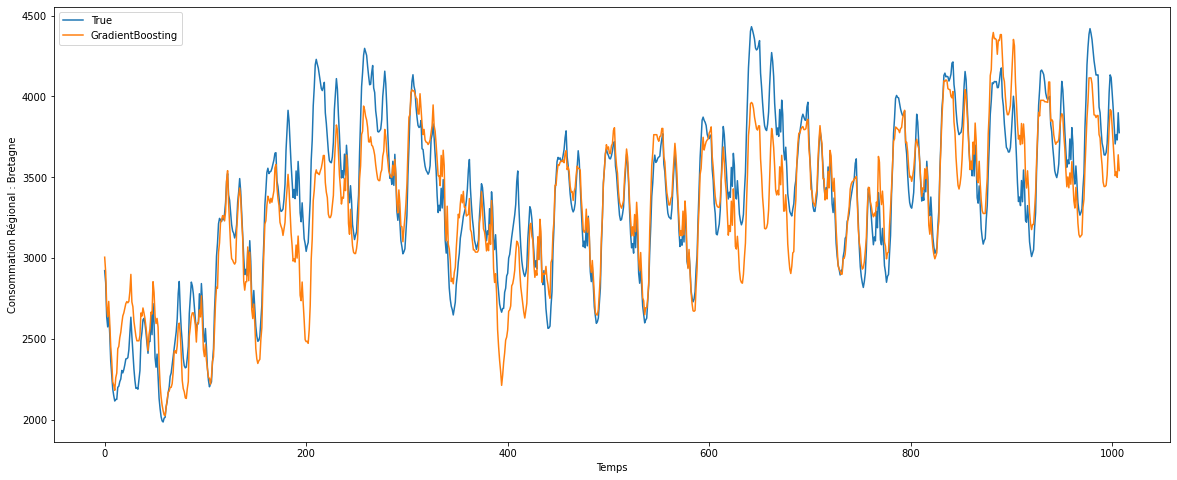

========================================= Centre =========================================
========== RMSE ==========
171.02524177150255
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.843119
4  ConsoJ-7    0.087837
1       tow    0.040729
2   Fourier    0.016915
0       tod    0.011399
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


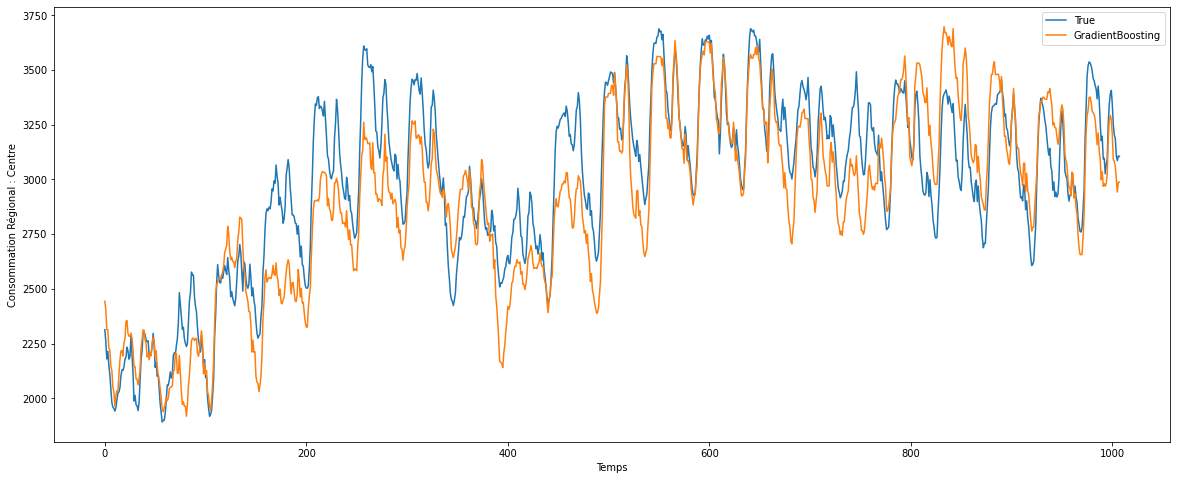

========================================= GrandEst =========================================
========== RMSE ==========
305.13400532816854
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.646636
4  ConsoJ-7    0.260593
1       tow    0.060625
2   Fourier    0.021414
0       tod    0.010731
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


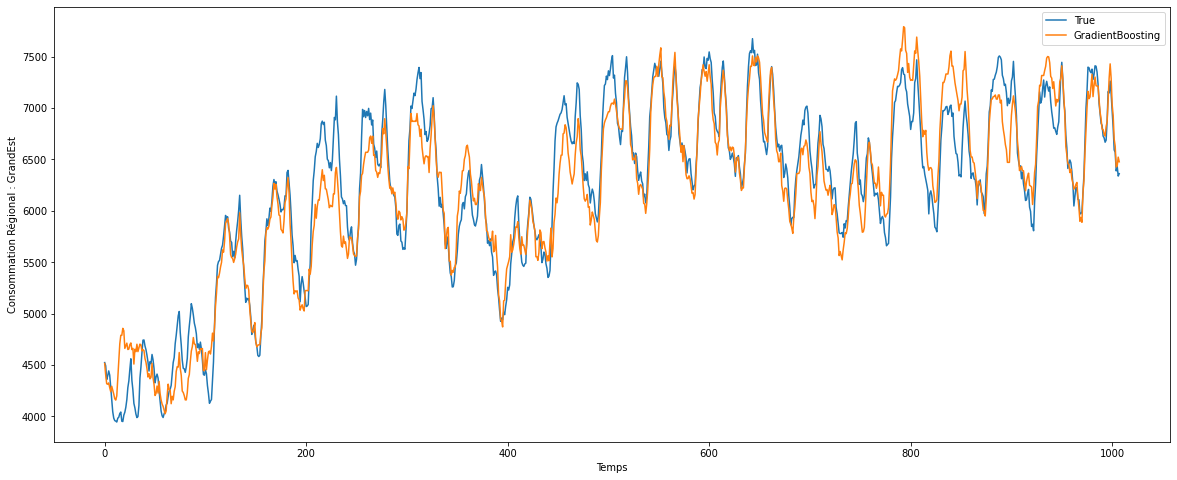

========================================= HautsDeFrance =========================================
========== RMSE ==========
454.2352178752621
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.767459
4  ConsoJ-7    0.160803
1       tow    0.043283
2   Fourier    0.019179
0       tod    0.009275
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


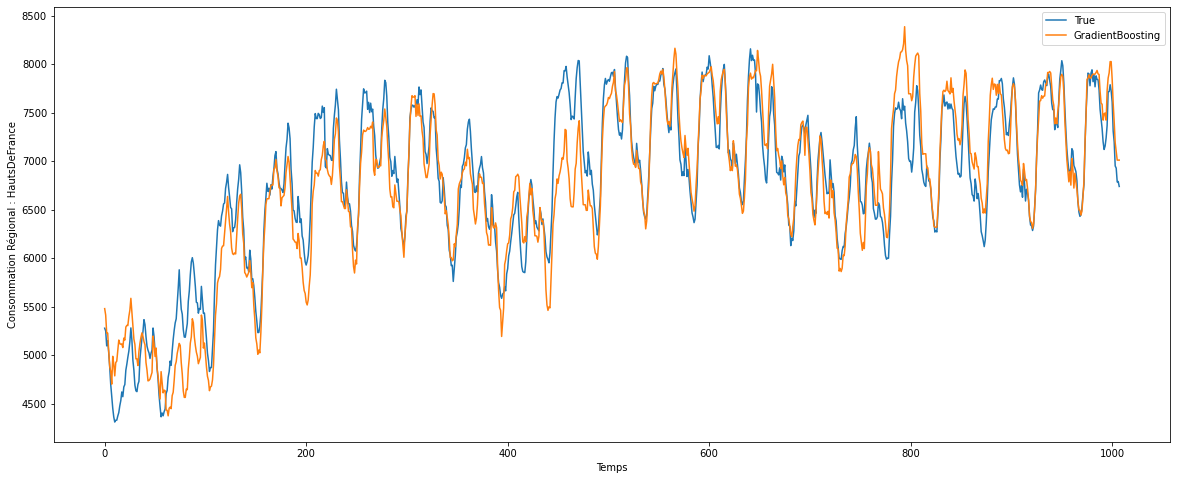

========================================= IDF =========================================
========== RMSE ==========
475.0037299150407
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.806779
4  ConsoJ-7    0.134009
1       tow    0.036751
0       tod    0.011857
2   Fourier    0.010603
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


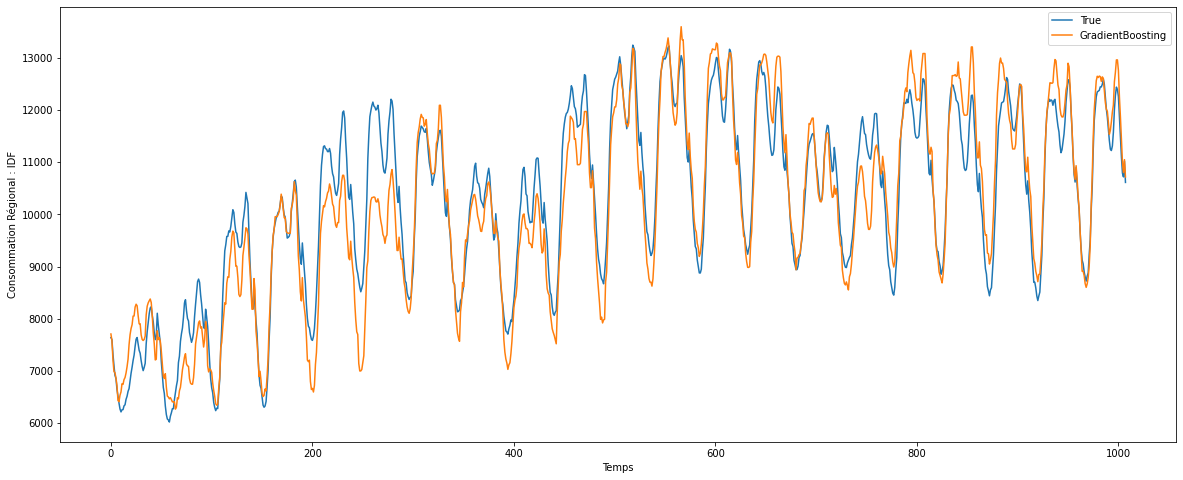

========================================= Normandie =========================================
========== RMSE ==========
176.52256880055612
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.832954
4  ConsoJ-7    0.099047
1       tow    0.038442
2   Fourier    0.018151
0       tod    0.011406
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


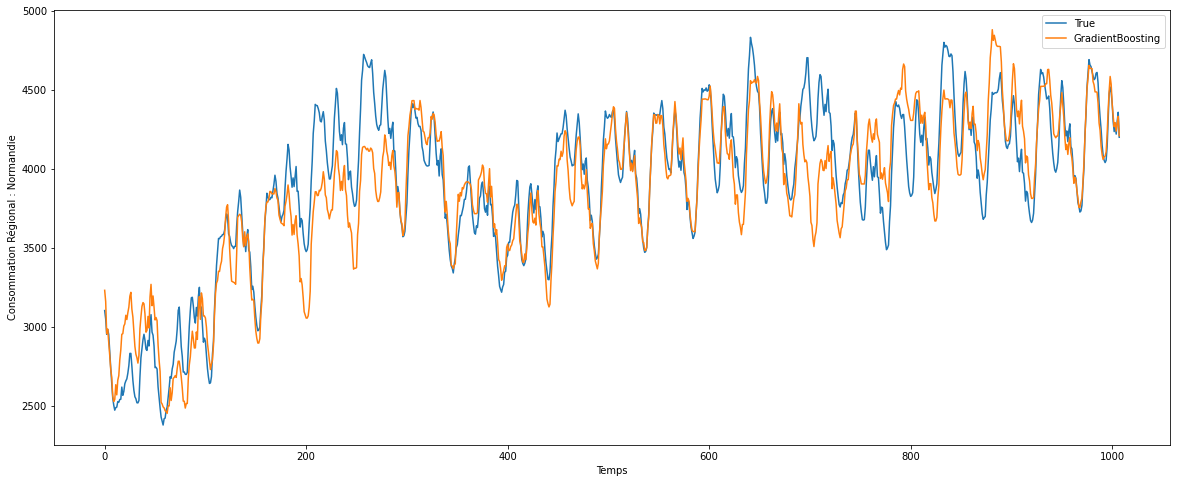

========================================= NouvelleAquitaine =========================================
========== RMSE ==========
411.09154718404636
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.806265
4  ConsoJ-7    0.115445
1       tow    0.040529
2   Fourier    0.024991
0       tod    0.012770
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


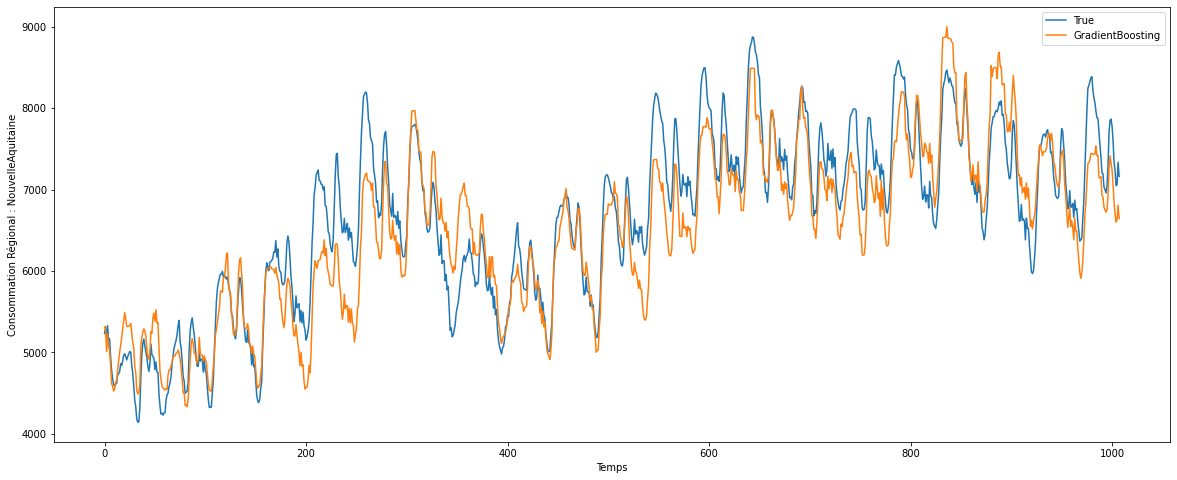

========================================= Occitanie =========================================
========== RMSE ==========
264.9023117940974
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.851511
4  ConsoJ-7    0.085138
1       tow    0.035145
2   Fourier    0.017516
0       tod    0.010691
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


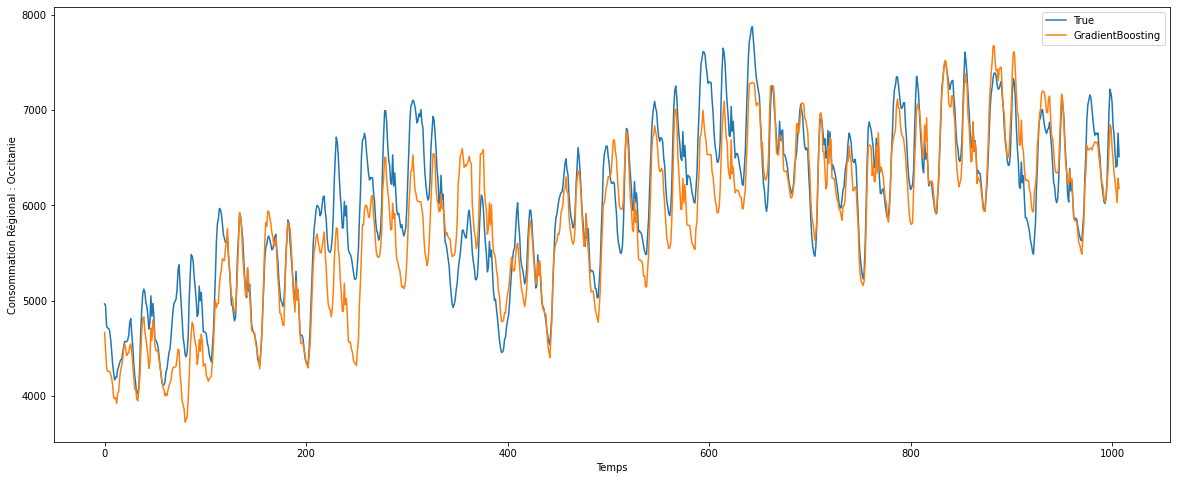

========================================= PACA =========================================
========== RMSE ==========
198.49697759312178
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.878698
4  ConsoJ-7    0.076788
1       tow    0.024613
2   Fourier    0.012387
0       tod    0.007514
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


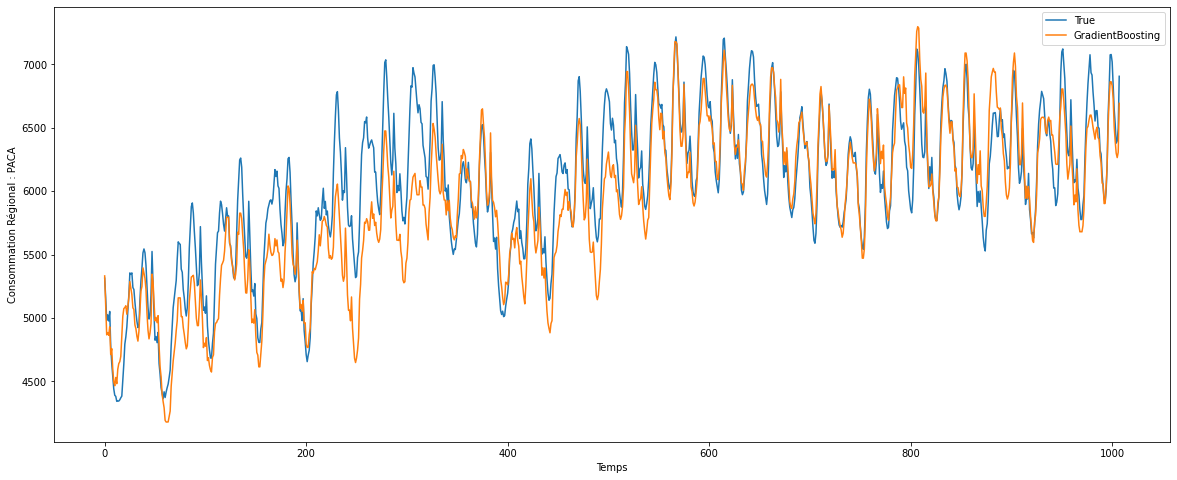

========================================= PaysDeLoire =========================================
========== RMSE ==========
282.0029346622394
========== Feature Importance ==========
    Feature  Importance
3  ConsoJ-1    0.709163
4  ConsoJ-7    0.199790
1       tow    0.055333
2   Fourier    0.021844
0       tod    0.013869
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


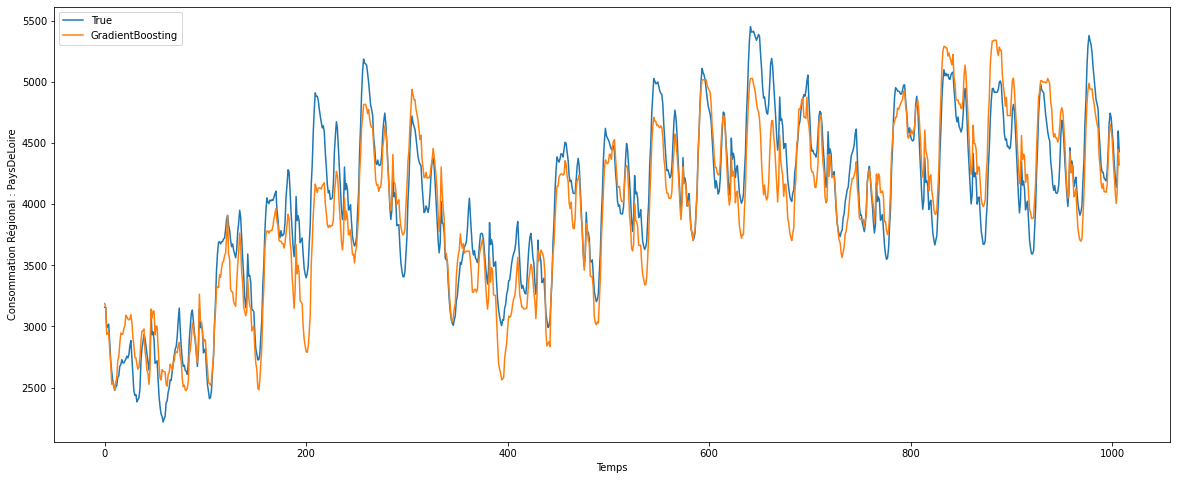

In [5]:
Regional_Model("Aura", temperature=False)
Regional_Model("Bourgogne", temperature=False)
Regional_Model("Bretagne", temperature=False)
Regional_Model("Centre", temperature=False)
Regional_Model("GrandEst", temperature=False)
Regional_Model("HautsDeFrance", temperature=False)
Regional_Model("IDF", temperature=False)
Regional_Model("Normandie", temperature=False)
Regional_Model("NouvelleAquitaine", temperature=False)
Regional_Model("Occitanie", temperature=False)
Regional_Model("PACA", temperature=False)
Regional_Model("PaysDeLoire", temperature=False)

# With T-1 Predicted Feature (Aura ONLY)

========== RMSE ==========
483.9732096196107
========== Prédiction des 3 premières semaines de Janvier 2022 ==========


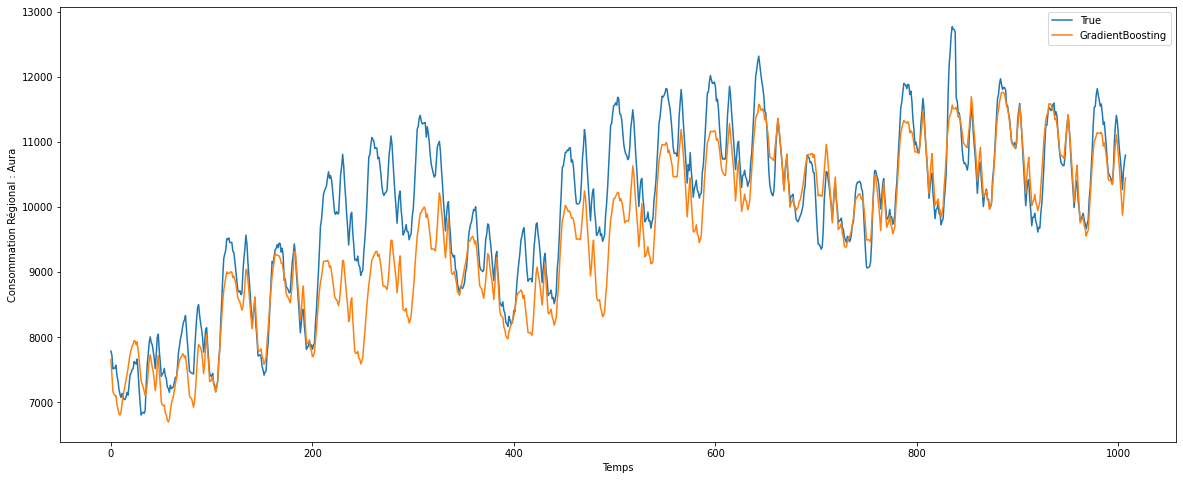

In [6]:
df = pd.read_csv(f'https://raw.githubusercontent.com/Tdjaaleb/MALIA/main/Time%20Series/Preprocessing/Data/Region/clean_Aura.csv', sep=";")
train = df[:52561]
test = df[105216:]

train = train.dropna()
Y_train = train["Conso"]
X_train = train.drop(["Conso","Date","Heure","Temperature"], axis=1)

Y_test = test["Conso"]
X_test = test.drop(["Conso","Date","Heure","Temperature"], axis=1)

model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
model.fit(X_train, Y_train)

prediction=[]
for i in range(1, X_test.shape[0]):
    pred = model.predict(X_test[i-1:i]).item()
    X_test["ConsoT-1"].iloc[i] = pred
    prediction.append(pred)
        
print("========== RMSE ==========")
print(rmse(Y_test[:-1], prediction))

print("========== Prédiction des 3 premières semaines de Janvier 2022 ==========")
plt.figure(figsize=(20,8))
plt.plot(Y_test.reset_index()["Conso"][0:1008])
plt.plot(prediction[0:1008])
plt.xlabel("Temps")
plt.ylabel(f'Consommation Régional : Aura')
plt.legend(["True", "GradientBoosting"])
plt.show()